In [75]:
import numpy as np
import pandas as pd
url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/Dataset/income.csv'
df = pd.read_csv(url)
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [76]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [77]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

### Ubah dulu tipe data

In [78]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

object_columns = df.select_dtypes(include=['object']).columns
object_columns = object_columns.drop('income') if 'income' in object_columns else object_columns

for column in object_columns:
    df[column] = le.fit_transform(df[column])

### Coba one-hot encoding untuk fitur lain (hasil di akhir)

In [79]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df['sex'] = le.fit_transform(df['sex'])

# object_cols = df.select_dtypes(include=['object']).columns
# object_cols = object_cols.drop('income') if 'income' in object_cols else object_cols

# for col in object_cols:
#     if col != 'sex':
#         dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
#         df = pd.concat([df, dummies], axis=1)
#         df = df.drop(col, axis=1)


In [80]:
df['income'].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

### Labelling manual untuk data ordinal

In [81]:
df['income'] = df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})


In [82]:
df['income'].value_counts()

income
0    37155
1    11687
Name: count, dtype: int64

In [83]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,4,215419,9,13,0,10,1,4,0,0,0,36,39,0
48838,64,9,321403,11,9,6,15,2,2,1,0,0,40,39,0
48839,38,4,374983,9,13,2,10,0,4,1,0,0,50,39,0
48840,44,4,83891,9,13,0,1,3,1,1,5455,0,40,39,0


<Axes: >

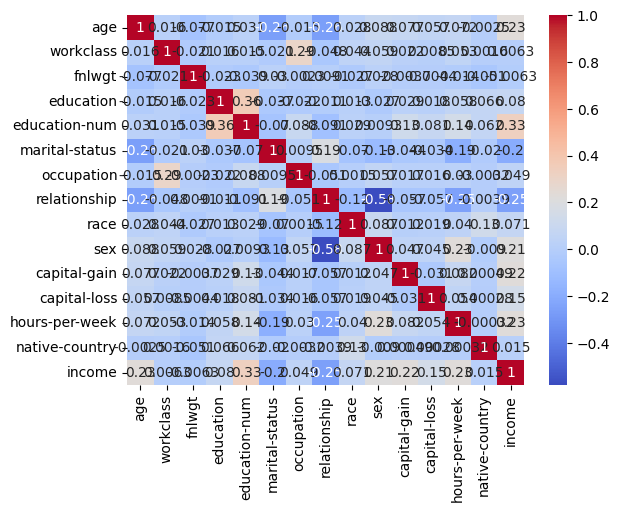

In [84]:
import seaborn as sns
df.corr()
# heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


### Pilih fitur yang korelasinya tinggi (hasil perbandingan di akhir)

In [85]:
## select features
# df = df[['age', 'education-num','sex', 'capital-gain', 'hours-per-week', 'income']]

<Axes: >

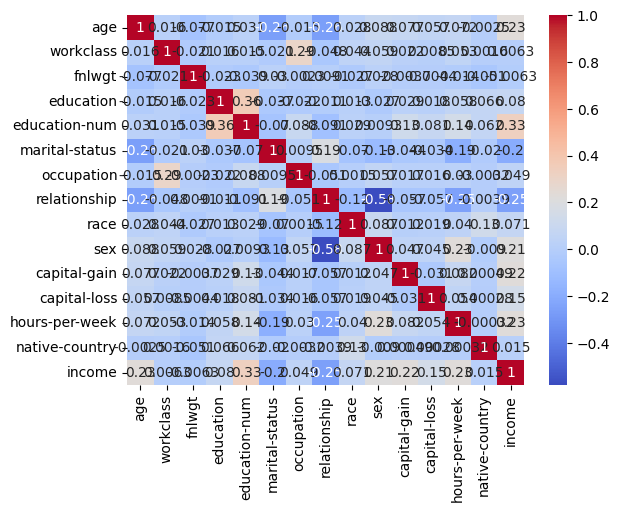

In [86]:
df.corr()
# heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [87]:
from sklearn.model_selection import train_test_split

X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## K-Nearest Neighbors (KNN) Classifier

KNN classifier adalah metode non-parametrik yang memprediksi kelas suatu data poin berdasarkan mayoritas kelas dari **k** tetangga terdekatnya dalam ruang fitur. Jarak antara titik biasanya dihitung menggunakan **Euclidean distance**:
 
$d(p,q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}$

 di mana p dan q adalah dua titik dalam ruang berdimensi n.

Untuk suatu titik x, prediksi kelas dihitung berdasarkan voting mayoritas:

$\hat{y}(x) = \text{mode}(y_1,...,y_k)$

di mana $y_i$ adalah kelas dari k tetangga terdekat.

## Decision Tree Classifier
 
 Decision tree classifier membuat model berbentuk pohon keputusan untuk klasifikasi berdasarkan fitur-fitur yang ada. Algoritma ini membagi data ke dalam subset berdasarkan ambang batas fitur yang memaksimalkan information gain atau meminimalkan impurity (seperti Gini impurity atau entropy) dalam setiap subset.
 
 Pada setiap node, kriteria pemisahan menggunakan Gini impurity:
 
 $Gini = 1 - \sum_{i=1}^{c} (p_i)^2$
 
 di mana $p_i$ adalah proporsi kelas i dalam node tersebut dan c adalah jumlah kelas.
 
 Prediksi akhir untuk leaf node adalah kelas mayoritas dari data pelatihan dalam node tersebut:
 
 $\hat{y} = \text{mode}(\{y_i : i \in \text{leaf}\})$

In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)

In [90]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_pred_proba_dt = dt.predict_proba(X_test)


In [91]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_pred_proba_xgb = xgb.predict_proba(X_test)


Evaluasi Model

Beberapa metrik evaluasi yang digunakan untuk mengukur performa model klasifikasi:

## Accuracy
Proporsi prediksi yang benar dari total prediksi:

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

di mana:
- TP (True Positive): kasus positif yang diprediksi benar sebagai positif
- TN (True Negative): kasus negatif yang diprediksi benar sebagai negatif  
- FP (False Positive): kasus negatif yang salah diprediksi sebagai positif
- FN (False Negative): kasus positif yang salah diprediksi sebagai negatif

## Precision
Proporsi prediksi positif yang benar:

$Precision = \frac{TP}{TP + FP}$

## Recall
Proporsi kasus positif aktual yang diprediksi benar:

$Recall = \frac{TP}{TP + FN}$

## F1 Score
Rata-rata harmonik dari precision dan recall:

$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$

## ROC (Receiver Operating Characteristic) Curve
Kurva yang menunjukkan trade-off antara True Positive Rate (TPR/Recall) dan False Positive Rate (FPR):

$TPR = \frac{TP}{TP + FN}$

$FPR = \frac{FP}{FP + TN}$

## AUC-ROC Score
Area Under the ROC Curve - mengukur kemampuan model untuk membedakan kelas. Nilai 1.0 berarti klasifikasi sempurna, 0.5 berarti klasifikasi acak.


In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_pred_knn)

print(f"KNN Metrics:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")
print(f"AUC-ROC: {auc_knn:.4f}\n")



KNN Metrics:
Accuracy: 0.8140
Precision: 0.6296
Recall: 0.5550
F1 Score: 0.5899
AUC-ROC: 0.7256



In [93]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_pred_dt)

print(f"Decision Tree Metrics:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")
print(f"AUC-ROC: {auc_dt:.4f}")

Decision Tree Metrics:
Accuracy: 0.8094
Precision: 0.6028
Recall: 0.6140
F1 Score: 0.6083
AUC-ROC: 0.7427


In [94]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_xgb)

print(f"XGBoost Metrics:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"AUC-ROC: {auc_xgb:.4f}")

XGBoost Metrics:
Accuracy: 0.8732
Precision: 0.7968
Recall: 0.6361
F1 Score: 0.7074
AUC-ROC: 0.7923


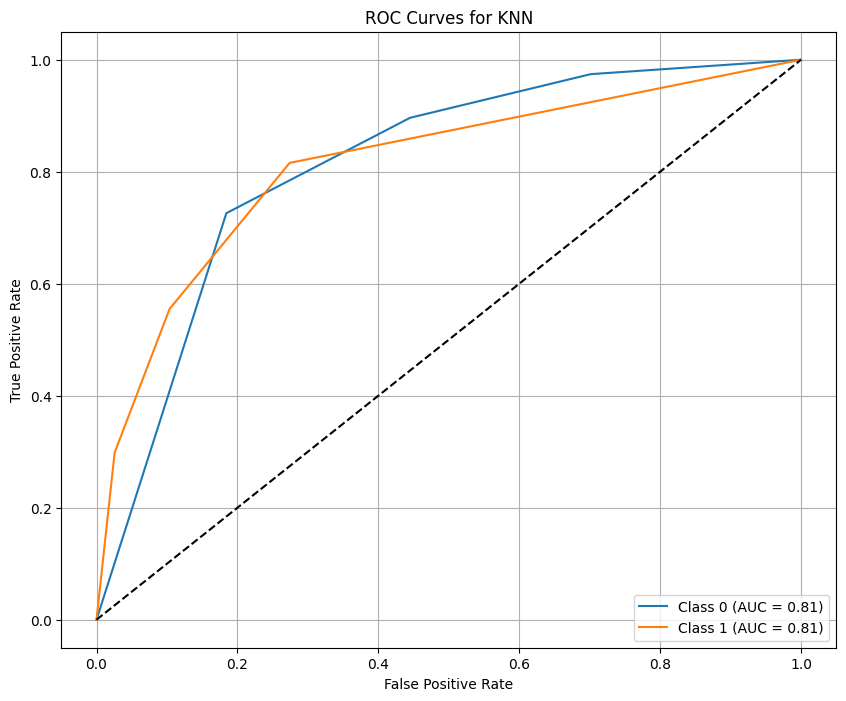

In [100]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

classes = sorted(y_test.unique())

for i in classes:
    y_test_bin = (y_test == i).astype(int)
    knn_pred_proba_class = y_pred_proba_knn[:, i]
    
    fpr, tpr, _ = roc_curve(y_test_bin, knn_pred_proba_class)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for KNN')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()


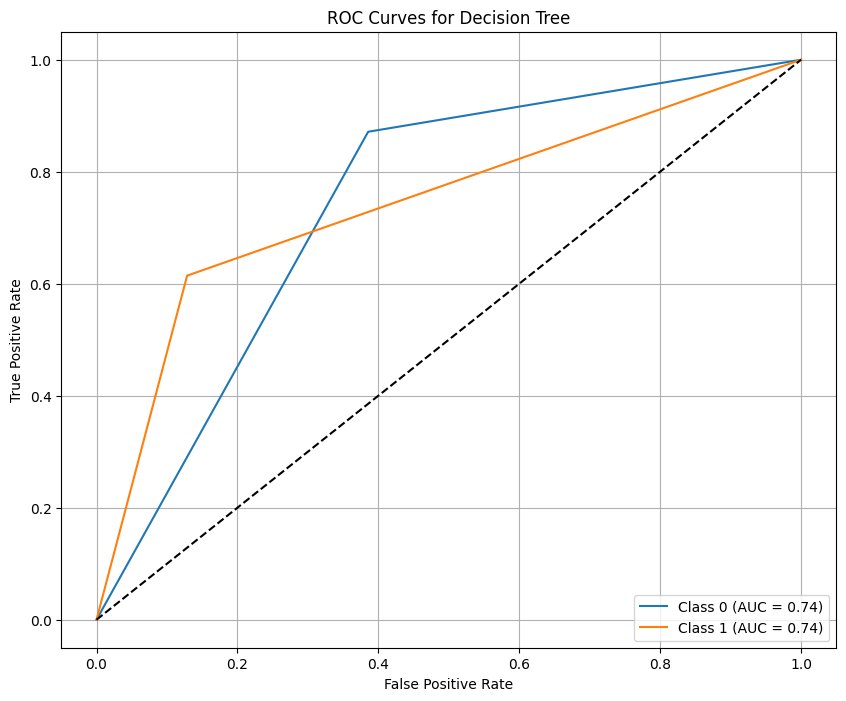

In [101]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

classes = sorted(y_test.unique())

for i in classes:
    y_test_bin = (y_test == i).astype(int)
    dt_pred_proba_class = y_pred_proba_dt[:, i]
    
    fpr, tpr, _ = roc_curve(y_test_bin, dt_pred_proba_class)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

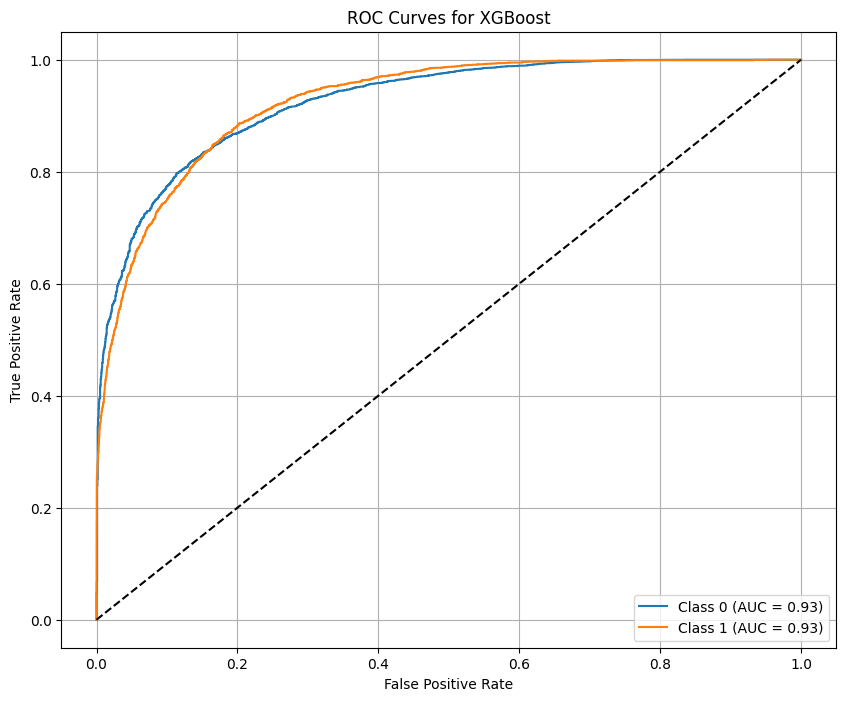

In [102]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

classes = sorted(y_test.unique())

for i in classes:
    y_test_bin = (y_test == i).astype(int)
    xgb_pred_proba_class = y_pred_proba_xgb[:, i]
    
    fpr, tpr, _ = roc_curve(y_test_bin, xgb_pred_proba_class)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for XGBoost')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

Semua model cukup baik, XGBoost terbaik, dan jauh lebih baik dibanding Decision Tree, sesuai ekspektasi

### XGBoost Metrics:
- Accuracy: 0.8732
- Precision: 0.7968
- Recall: 0.6361
- F1 Score: 0.7074
- AUC-ROC: 0.7923

### XGBoost, model yang meningkatkan performa dari decision tree, hasilnya lebih baik dari decision tree sendiri, sesuai ekspektasi.
Untuk hasil preprocessing lain ada di bawah

### Metrics (berdasarkan tugas sebelumnya, bukan yang boosting)

<small>

**Limited features, label encoding:**

*KNN Metrics*
- Accuracy: 0.7916
- Precision: 0.5782
- Recall: 0.5006
- F1 Score: 0.5366
- AUC-ROC: 0.6923

*Decision Tree Metrics*
- Accuracy: 0.8077
- Precision: 0.6379
- Recall: 0.4675
- F1 Score: 0.5396
- AUC-ROC: 0.6916

**All features, label encoding:**

*KNN Metrics*
- Accuracy: 0.8140
- Precision: 0.6296
- Recall: 0.5550
- F1 Score: 0.5899
- AUC-ROC: 0.7256

*Decision Tree Metrics*
- Accuracy: 0.8094
- Precision: 0.6028
- Recall: 0.6140
- F1 Score: 0.6083
- AUC-ROC: 0.7427

**All features, one hot encoding:**

*KNN Metrics*
- Accuracy: 0.8121
- Precision: 0.6243
- Recall: 0.5533
- F1 Score: 0.5867
- AUC-ROC: 0.7238

*Decision Tree Metrics*
- Accuracy: 0.8173
- Precision: 0.6202
- Recall: 0.6246
- F1 Score: 0.6224
- AUC-ROC: 0.7516

</small>

 Dalam mengevaluasi model klasifikasi, berbagai metrics memiliki fungsi yang berbeda. Berikut beberapa hal penting:

 1. F1 Score sangat relevan untuk dataset yang tidak seimbang (seperti data pendapatan ini) karena:
    - Menyeimbangkan precision dan recall
    - Mencegah kesalahan interpretasi dari accuracy yang tinggi pada majority class
    - Memberikan satu nilai untuk membandingkan model

 2. AUC-ROC juga sangat berguna karena:
    - Menunjukkan kemampuan model dalam membedakan antar class
    - Tidak bergantung pada classification threshold yang dipilih  
    - Bekerja dengan baik untuk dataset yang tidak seimbang

 3. Accuracy saja bisa menyesatkan karena:
    - Pada data yang tidak seimbang, accuracy tinggi bisa didapat hanya dengan memprediksi majority class
    - Tidak menunjukkan performa pada minority class

 Untuk masalah klasifikasi pendapatan ini, F1 Score dan AUC-ROC paling relevan karena:
 - Data tidak seimbang (sampel <=50K lebih banyak dari >50K)
 - Kita perlu mengidentifikasi kedua kelas pendapatan dengan tepat
 - Membutuhkan pandangan yang seimbang terhadap performa model


# XGBoost (Extreme Gradient Boosting)

XGBoost adalah implementasi yang dioptimalkan dari algoritma Gradient Boosting. Ini adalah algoritma machine learning berbasis ensemble yang menggabungkan beberapa model lemah (biasanya decision trees) untuk membuat model yang kuat.

## Cara Kerja XGBoost:

1. **Sequential Learning**: XGBoost membangun model secara bertahap, di mana setiap model baru mencoba memperbaiki kesalahan dari model sebelumnya.

2. **Regularisasi**: XGBoost menerapkan regularisasi untuk mencegah overfitting, membuat model lebih robust.

3. **Penanganan Data yang Hilang**: XGBoost memiliki mekanisme bawaan untuk menangani nilai yang hilang.

## Kelebihan XGBoost:

- **Performa Tinggi**: Sering memenangkan kompetisi machine learning karena akurasinya yang tinggi.
- **Efisiensi**: Dioptimalkan untuk kecepatan dan penggunaan memori yang efisien.
- **Fleksibilitas**: Dapat digunakan untuk masalah regresi, klasifikasi, dan peringkat.
- **Regularisasi**: Memiliki parameter regularisasi yang membantu mencegah overfitting.

## Parameter Utama XGBoost:

- **n_estimators**: Jumlah pohon keputusan yang akan dibangun.
- **learning_rate**: Tingkat pembelajaran yang mengontrol kontribusi setiap pohon.
- **max_depth**: Kedalaman maksimum dari setiap pohon.
- **subsample**: Fraksi sampel yang digunakan untuk membangun setiap pohon.
- **colsample_bytree**: Fraksi fitur yang digunakan untuk membangun setiap pohon.

XGBoost sangat efektif untuk dataset terstruktur.
